I. Classification

In [ ]:
#Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

#Load the digits dataset: digits
digits = datasets.load_digits()

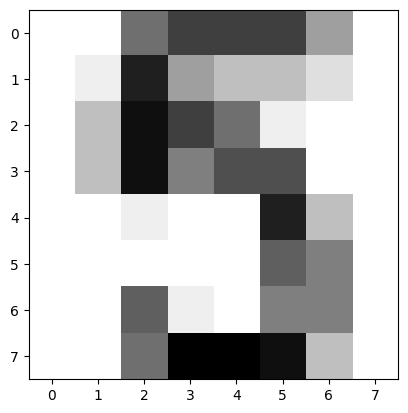

In [ ]:
#Display image 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

Before applying the classifier, we need to split the dataset into training and testing parts. 

In [ ]:
from sklearn.model_selection import train_test_split
X = digits.data
y = digits.target

#split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

Build KNN classifer for the above dataset

In [ ]:
#Import necessary modules
from sklearn.neighbors import KNeighborsClassifier

import numpy as np

#create a k-NN classifer with 3 neighbors :knn
knn = KNeighborsClassifier(n_neighbors=3)

#Fit the classifer to the training data
knn.fit(X_train, y_train)

#Print the accuracy
print("Accuracy: {0}".format(knn.score(X_test, y_test)))

Accuracy: 0.9861111111111112


- Varying Number of Neighbours

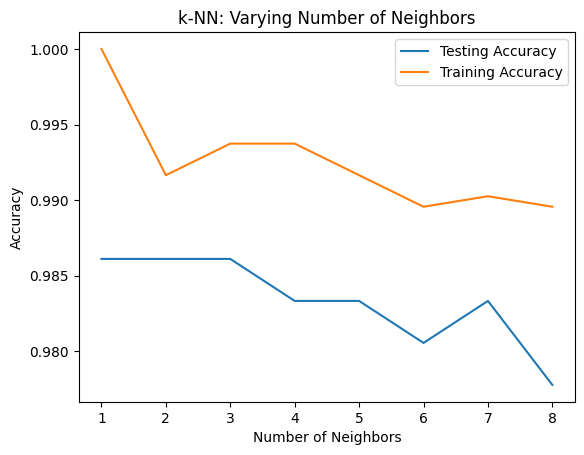

In [ ]:
#Step arrays to store train and test accuracies
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

#Loop over different values of k
for i, k in enumerate(neighbors):
  #Set up a k-NN Classifier with k neighbors: knn
  knn = KNeighborsClassifier(n_neighbors=k)

  #Fit the classifier to the training data
  knn.fit(X_train, y_train)

  #Compute accuracy on the training set
  train_accuracy[i] = knn.score(X_train, y_train)

  #Compute accuracy on the testing set
  test_accuracy[i] = knn.score(X_test, y_test)

#Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as P
from torch.autograd import Variable

In [ ]:
from torchvision import datasets, transforms
mnist = datasets.MNIST(root='.', train=True, download=True)

In [ ]:

print("Number of training examples", mnist.train_data.shape)
print("Image information", mnist[0])

Number of training examples torch.Size([60000, 28, 28])
Image information (<PIL.Image.Image image mode=L size=28x28 at 0x7FB2A7FAF850>, 5)


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


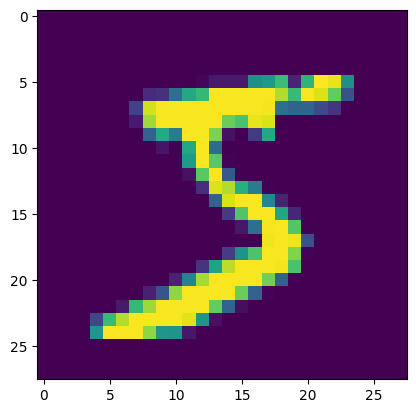

In [ ]:
%matplotlib inline
plt.imshow(mnist[0][0])

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    self.fully = nn.Sequential(
        nn.Linear(28*28, 10)
    )

  def forward(self, x):
    x = x.view(-1,28*28)
    x = self.fully(x)
    x = P.log_softmax(x, dim=1)
    return x

In [ ]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.',train=True,transform=transforms.Compose([transforms.ToTensor()])), batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.',train=False,transform=transforms.Compose([transforms.ToTensor()])), batch_size=1, shuffle=True)  

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision import datasets, transforms

In [ ]:
def train():
  learning_rate = 1e-3
  num_epochs = 3

  net = Net()
  optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

  for epoch in range(num_epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
      output = net(data)

      loss = F.nll_loss(output, target)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if batch_idx % 100 == 0:
        print('Epoch = %f. Batch = %s. Loss = %s' % (epoch, batch_idx, loss.item()))
  return net

In [ ]:
net = train()

Epoch = 0.000000. Batch = 0. Loss = 2.294133186340332
Epoch = 0.000000. Batch = 100. Loss = 0.825413703918457
Epoch = 0.000000. Batch = 200. Loss = 0.5334162712097168
Epoch = 0.000000. Batch = 300. Loss = 0.4495614767074585
Epoch = 0.000000. Batch = 400. Loss = 0.563365638256073
Epoch = 0.000000. Batch = 500. Loss = 0.5335783362388611
Epoch = 0.000000. Batch = 600. Loss = 0.366990864276886
Epoch = 0.000000. Batch = 700. Loss = 0.48372524976730347
Epoch = 0.000000. Batch = 800. Loss = 0.3486781716346741
Epoch = 0.000000. Batch = 900. Loss = 0.20773553848266602
Epoch = 1.000000. Batch = 0. Loss = 0.25472357869148254
Epoch = 1.000000. Batch = 100. Loss = 0.4740252196788788
Epoch = 1.000000. Batch = 200. Loss = 0.4175112545490265
Epoch = 1.000000. Batch = 300. Loss = 0.30044689774513245
Epoch = 1.000000. Batch = 400. Loss = 0.4623027443885803
Epoch = 1.000000. Batch = 500. Loss = 0.4990956783294678
Epoch = 1.000000. Batch = 600. Loss = 0.3373512029647827
Epoch = 1.000000. Batch = 700. Loss

In [ ]:
net.eval()
test_loss = 0
correct = 0
total = 0

for data, target in test_loader:
  total += len(target)
  output = net(data)
  pred = output.max(1, keepdim=True) [1]
  correct += target.eq(pred.view_as(target)).sum()

print("Correct out of %s" % total, correct.item())
print("Percentage accuracy", correct.item()*100/10000.)

Correct out of 10000 9235
Percentage accuracy 92.35


II. Linear Regression

- Load the dataset

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving gapminder.csv to gapminder.csv


In [ ]:
# Import numpy and pandas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#read the CSV file into a dataframe: df
df = pd.read_csv('gapminder.csv')

Use seaborn to visualize the data of Gapminder like following image:

<ipython-input-36-4976fa591727>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), square=True, cmap='RdYlGn')


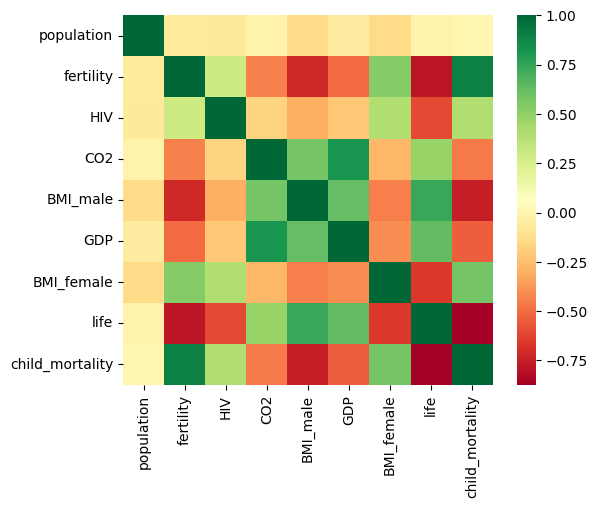

In [ ]:
ax = sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

Apply linear regression with the 'fertility' feature to predict life expectancy

0.6162438752151917


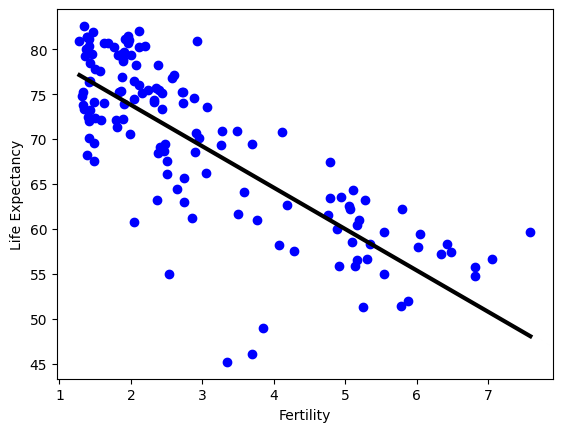

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x_fertility = df['fertility'].values.reshape(-1,1)
y_life = df['life'].values.reshape(-1,1)
prediction_space = np.linspace(min(x_fertility), max(x_fertility)).reshape(-1,1)

#create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_fertility, y_life, test_size=0.3, random_state=42)

#Create the regression model: reg_all
reg = LinearRegression()

#Fit the regression to the training data
reg.fit(x_train, y_train)
y_predict = reg.predict(prediction_space)

#Print accuracy
print(reg.score(x_fertility, y_life))

#Plot regression line
plt.scatter(x_fertility, y_life, color='blue')
plt.plot(prediction_space, y_predict, color='black', linewidth=3)
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')
plt.show()

Apply linear regression with the all features to predict life expectancy. Compare the model score when 
using all features to one feature in previous step.

In [ ]:
features = pd.read_csv('gapminder.csv')
df = pd.read_csv('gapminder.csv')
del features['life']
del features['Region']

y_life = df['life'].values.reshape(-1,1)

#create training and test sets
x_train, x_test, y_train, y_test = train_test_split(features, y_life, test_size=0.3, random_state=42)

#Create the regression model: reg_all
reg_all = LinearRegression()
#Fit the regression to the training data
reg_all.fit(x_train, y_train)

#Print accuracy
print(reg_all.score(features, y_life))

0.8914651485793176


- Linear Regression using PyTorch

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

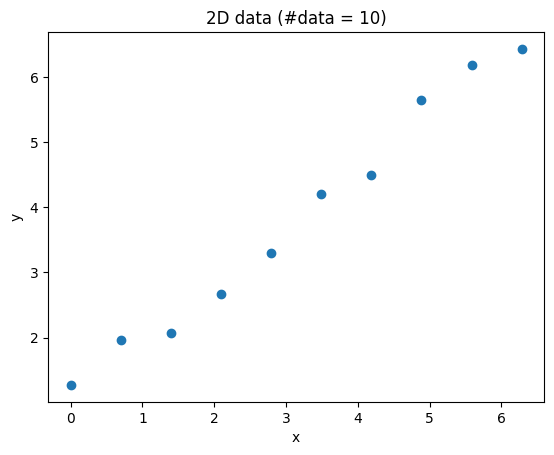

In [ ]:
N = 10 #Number of data points
m = .9
c = 1
x = np.linspace(0,2*np.pi,N)
y = m*x + c + np.random.normal(0,.3,x.shape)
plt.figure()
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' %N)
plt.show()

In [ ]:
import torch

Dataset

In [44]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
  def __init__(self,x, y):
    self.x = x
    self.y = y

  def __len__ (self):
    return len(self.x)

  def __getitem__ (self, idx):
    sample = {
        'feature': torch.tensor([1,self.x[idx]]),
        'label': torch.tensor([self.y[idx]])
    }
    return sample

In [45]:
dataset = MyDataset(x, y)
for i in range(len(dataset)):
  sample = dataset[i]
  print(i, sample['feature'], sample['label'])

0 tensor([1., 0.], dtype=torch.float64) tensor([1.2722], dtype=torch.float64)
1 tensor([1.0000, 0.6981], dtype=torch.float64) tensor([1.9557], dtype=torch.float64)
2 tensor([1.0000, 1.3963], dtype=torch.float64) tensor([2.0634], dtype=torch.float64)
3 tensor([1.0000, 2.0944], dtype=torch.float64) tensor([2.6611], dtype=torch.float64)
4 tensor([1.0000, 2.7925], dtype=torch.float64) tensor([3.2978], dtype=torch.float64)
5 tensor([1.0000, 3.4907], dtype=torch.float64) tensor([4.2077], dtype=torch.float64)
6 tensor([1.0000, 4.1888], dtype=torch.float64) tensor([4.5013], dtype=torch.float64)
7 tensor([1.0000, 4.8869], dtype=torch.float64) tensor([5.6523], dtype=torch.float64)
8 tensor([1.0000, 5.5851], dtype=torch.float64) tensor([6.1762], dtype=torch.float64)
9 tensor([1.0000, 6.2832], dtype=torch.float64) tensor([6.4297], dtype=torch.float64)


Dataloader

In [46]:
from torch.utils.data import DataLoader

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 4
dataloader = DataLoader(dataset, batch_size = batch_size, shuffle= shuffle, num_workers=num_workers)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [48]:
import pprint as pp
for i_batch, samples in enumerate(dataloader):
  print('\nbatch# = %s' % i_batch)
  print('samples: ')
  pp.pprint(samples)


batch# = 0
samples: 
{'feature': tensor([[1.0000, 4.8869],
        [1.0000, 4.1888],
        [1.0000, 2.7925],
        [1.0000, 6.2832]], dtype=torch.float64),
 'label': tensor([[5.6523],
        [4.5013],
        [3.2978],
        [6.4297]], dtype=torch.float64)}

batch# = 1
samples: 
{'feature': tensor([[1.0000, 0.6981],
        [1.0000, 0.0000],
        [1.0000, 1.3963],
        [1.0000, 5.5851]], dtype=torch.float64),
 'label': tensor([[1.9557],
        [1.2722],
        [2.0634],
        [6.1762]], dtype=torch.float64)}

batch# = 2
samples: 
{'feature': tensor([[1.0000, 3.4907],
        [1.0000, 2.0944]], dtype=torch.float64),
 'label': tensor([[4.2077],
        [2.6611]], dtype=torch.float64)}


Model

In [49]:
import torch.nn as nn
import torch.nn.functional as F

class MyModel(nn.Module):
  def __init__ (self, input_dim, output_dim):
    super(MyModel, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    out = self.linear(x)
    return out

Setting a model for our problem

In [50]:
input_dim = 2
output_dim = 1

model = MyModel(input_dim, output_dim)

Cost function

In [51]:
cost = nn.MSELoss()

Minimizing the cost function

In [54]:
num_epochs = 10 # How many times the entire training data is seen ?
l_rate = 0.01
model.double()
optimiser = torch.optim.SGD(model.parameters(), lr=l_rate)

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 4
training_sample_generator = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

for epoch in range(num_epochs):
  print('Epoch = %s' % epoch)
  for batch_i, samples in enumerate(training_sample_generator):
    predictions = model(samples['feature'])
    error = cost(predictions, samples['label'])
    print('\tBatch = %s, Error = %s' % (batch_i, error.item()))

    #before the backward pass, use the optmizer object to zero all of the gradients for the variables it will update (which are the learnable weights of the model). this is because by default, gradients are accumulated in buffers(i.e, not overwritten) whenever /backward() is called checkout docs of torch.autograd.backward for more details.
    optimiser.zero_grad()

    #backward pass: compute gradient of the loss with respect to model parameters
    error.backward()

    #calling the step function on an optimiser makes an update to its parameters
    optimiser.step()

Epoch = 0
	Batch = 0, Error = 0.05340990615798853
	Batch = 1, Error = 0.32905973272063116
	Batch = 2, Error = 0.027168899807393062
Epoch = 1
	Batch = 0, Error = 0.04105427786408693
	Batch = 1, Error = 0.19021832663337537
	Batch = 2, Error = 0.2978429847836239
Epoch = 2
	Batch = 0, Error = 0.15731138664279593
	Batch = 1, Error = 0.19937960857521153
	Batch = 2, Error = 0.021580266697927817
Epoch = 3
	Batch = 0, Error = 0.1941915517484133
	Batch = 1, Error = 0.15235726414270948
	Batch = 2, Error = 0.0010727006610990288
Epoch = 4
	Batch = 0, Error = 0.020563230452204703
	Batch = 1, Error = 0.07060117338104016
	Batch = 2, Error = 0.5198173508321811
Epoch = 5
	Batch = 0, Error = 0.13173161870393607
	Batch = 1, Error = 0.1617935936075272
	Batch = 2, Error = 0.04005363193907128
Epoch = 6
	Batch = 0, Error = 0.11672358139784922
	Batch = 1, Error = 0.12065449901946676
	Batch = 2, Error = 0.16695658306074196
Epoch = 7
	Batch = 0, Error = 0.14986673516281518
	Batch = 1, Error = 0.14126467493206124

Let see how well the model has learnt the data

In [56]:
x_for_plotting = np.linspace(0, 2*np.pi, 1000)
design_matrix = torch.tensor(np.vstack([np.ones(x_for_plotting.shape), x_for_plotting]).T, dtype=torch.float32)
print('Design matrix shape: ', design_matrix.shape)

y_for_plotting = model.forward(design_matrix.double())
print('y_for_plotting shape:', y_for_plotting.shape)

Design matrix shape:  torch.Size([1000, 2])
y_for_plotting shape: torch.Size([1000, 1])


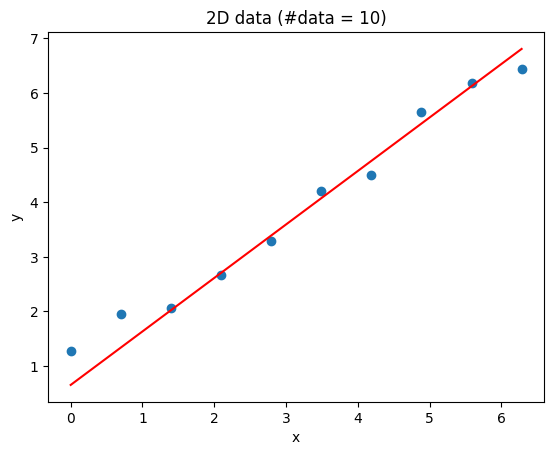

In [57]:
plt.figure()
plt.plot(x,y,'o')
plt.plot(x_for_plotting, y_for_plotting.data.numpy(), 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()

III. Recommendation Systems

Use cosine similarity to compute the missing rating in this table using user-based collaborative 
filtering (CF).

In [63]:
def user_cf(M, metric='cosine'):
  pred = np.copy(M)
  n_users, n_items = M.shape
  avg_ratings = np.nanmean(M, axis = 1)
  sim_users = sim_matrix(M, 'user', metric)
  for i in range(n_users):
    for j in range(n_items):
      if np.isnan(M[i,j]):
        pred[i,j] = avg_ratings[i] + np.nansum(sim_users[i] * (M[:,j] - avg_ratings)) / sum(sim_users[i])
  return pred

 Similarly, computing the missing rating using item-based CF.

In [64]:
def item_cf(M, metric='cosine'):
  pred = np.copy(M)
  n_users, n_items = M.shape
  avg_ratings = np.nanmean(M, axis=0)
  sim_items = sim_matrix(M, 'item', metric)
  for i in range(n_users):
    for j in range(n_items):
      if np.isnan(M[i,j]):
        pred[i,j] = avg_ratings[j] + np.nansum(sim_items[j] * (M[i,:] - avg_ratings)) / sum(sim_items[j])
  return pred

IV. Exercises

1. Classification

-  Load this dataset from scikit-learn

In [66]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris_data = load_iris()

In [67]:
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

- Classify using kNN with different k and simple neural network as described in Classification 
section.

In [68]:
from sklearn.model_selection import train_test_split
X = iris_data.data
Y =  iris_data.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [69]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [70]:
print("Accuracy: {0}".format(knn.score(X_test, Y_test)))

Accuracy: 1.0


- Compare the accuracy of the classifier in the plot.

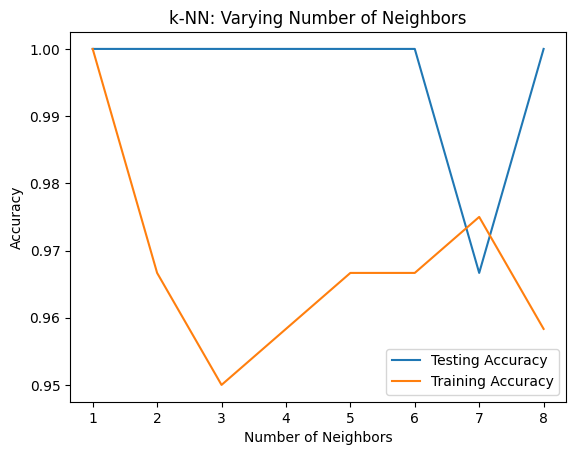

In [72]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    train_accuracy[i] = knn.score(X_train, Y_train)
    test_accuracy[i] = knn.score(X_test, Y_test)
    
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()  

- Classify using deep learning with CNN (1 plus)


In [73]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [74]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(-1, 4, 1, 1)
X_test = X_test.reshape(-1, 4, 1, 1)

In [75]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(2, 1), activation='relu', input_shape=(4, 1, 1)))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
4/4 [==============================] - 4s 420ms/step - loss: 1.1162 - accuracy: 0.2500 - val_loss: 1.1106 - val_accuracy: 0.3000
Epoch 2/50
4/4 [==============================] - 0s 50ms/step - loss: 1.0886 - accuracy: 0.3000 - val_loss: 1.0863 - val_accuracy: 0.3667
Epoch 3/50
4/4 [==============================] - 0s 50ms/step - loss: 1.0623 - accuracy: 0.3333 - val_loss: 1.0652 - val_accuracy: 0.3667
Epoch 4/50
4/4 [==============================] - 0s 30ms/step - loss: 1.0409 - accuracy: 0.3333 - val_loss: 1.0465 - val_accuracy: 0.3667
Epoch 5/50
4/4 [==============================] - 0s 40ms/step - loss: 1.0223 - accuracy: 0.3333 - val_loss: 1.0290 - val_accuracy: 0.4333
Epoch 6/50
4/4 [==============================] - 0s 50ms/step - loss: 1.0050 - accuracy: 0.4000 - val_loss: 1.0126 - val_accuracy: 0.4333
Epoch 7/50
4/4 [==============================] - 0s 39ms/step - loss: 0.9876 - accuracy: 0.4417 - val_loss: 0.9965 - val_accuracy: 0.5000
Epoch 8/50
4/4 [==========

1/1 [==============================] - 0s 30ms/step - loss: 0.6256 - accuracy: 0.7667
Test loss: 0.6255777478218079
Test accuracy: 0.7666666507720947


<Figure size 640x480 with 0 Axes>

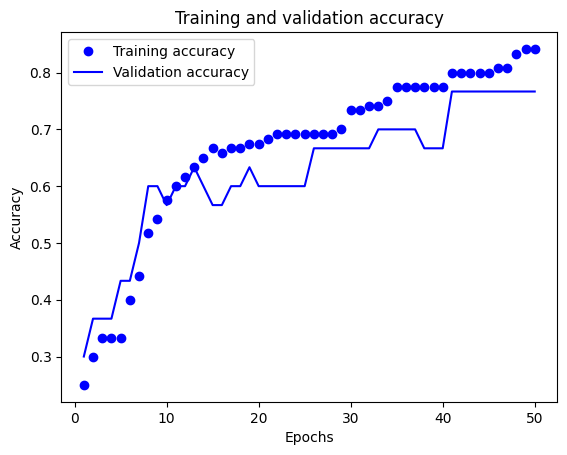

<Figure size 640x480 with 0 Axes>

In [76]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

2. Recommendation Systems

a. Content-Based Recommendation Model

In [77]:
from google.colab import files

uploaded = files.upload()

Saving movies.csv to movies.csv


In [78]:
from google.colab import files

uploaded = files.upload()

Saving ratings.csv to ratings.csv


In [79]:
from google.colab import files

uploaded = files.upload()

Saving users.csv to users (1).csv


In [81]:
movies = pd.read_csv('movies.csv', encoding="ISO-8859-1")
ratings = pd.read_csv('ratings.csv')
users = pd.read_csv('users (1).csv')
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity

-  Find list of used genres which is used to category the movies.

In [82]:
movies.head(20)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [84]:
ratings.head(20)

,user_id,movie_id,rating
0,1,1,3
1,1,3,5
2,1,4,4
3,1,5,3
4,1,6,3
5,1,7,3
6,1,9,3
7,1,10,2
8,1,11,4
9,1,12,4


In [85]:
users.head(20)

,user_id,gender,age,occupation,zipcode,age_desc,occ_desc
0,1,F,1,10,48067,Under 18,K-12 student
1,2,M,56,16,70072,56+,self-employed
2,3,M,25,15,55117,25-34,scientist
3,4,M,45,7,2460,45-49,executive/managerial
4,5,M,25,20,55455,25-34,writer
5,6,F,50,9,55117,50-55,homemaker
6,7,M,35,1,6810,35-44,academic/educator
7,8,M,25,12,11413,25-34,programmer
8,9,M,25,17,61614,25-34,technician/engineer
9,10,F,35,1,95370,35-44,academic/educator


In [86]:
genres_col = movies['genres']

In [87]:
genres_list = [genre.split('|') if type(genre) == str else [] for genre in genres_col]

In [88]:
unique_genres = set([genre for sublist in genres_list for genre in sublist])

In [89]:
genre_list = list(unique_genres)

genre_list

['War',
 'Thriller',
 'Comedy',
 'Horror',
 'Crime',
 'Fantasy',
 'Sci-Fi',
 'Drama',
 'Action',
 'Documentary',
 "Children's",
 'Musical',
 'Adventure',
 'Animation',
 'Romance']

- Vectorize the relationship between movies and genres and put them into Ij.

In [90]:
unique_genres = sorted(list(set([genre for sublist in genres_list for genre in sublist])))

In [91]:
Ij = np.zeros((len(movies), len(unique_genres)), dtype=int)
for i, genres in enumerate(genres_list):
    for genre in genres:
        j = unique_genres.index(genre)
        Ij[i, j] = 1

In [92]:
Ij[:4]

array([[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

- Vectorize the relationship between users and genres and put them into Uj (if user rate for a movie, 
he/she has the related history with the movies’genres).


In [93]:
merged_df = pd.merge(ratings, movies, on='movie_id')

In [94]:
unique_user_ids = sorted(list(set(merged_df['user_id'])))

In [95]:
Uj = np.zeros((len(unique_user_ids), len(unique_genres)), dtype=int)
for i, user_id in enumerate(unique_user_ids):
    user_ratings = merged_df.loc[merged_df['user_id'] == user_id]
    user_genre_list = [genre.split('|') if type(genre) == str else [] for genre in user_ratings['genres']]
    user_genre_set = set([genre for sublist in user_genre_list for genre in sublist])
    for j, genre in enumerate(unique_genres):
        if genre in user_genre_set:
            Uj[i, j] = 1

In [96]:
Uj[:4]

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]])

- Compute the cosine_similarity between movies and users. Hint: you can use 
sklearn.metrics.pairwise and cosine_similarity for quick calculation.

In [97]:
from sklearn.metrics.pairwise import cosine_similarity

In [98]:
one_hot_matrix = pd.get_dummies(movies['genres'].apply(pd.Series).stack()).sum(level=0)

<ipython-input-98-a674898c5be6>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  one_hot_matrix = pd.get_dummies(movies['genres'].apply(pd.Series).stack()).sum(level=0)


In [99]:
Umatrix = np.zeros((len(unique_user_ids), one_hot_matrix.shape[1]), dtype=int)
for i, user_id in enumerate(unique_user_ids):
    user_ratings = merged_df.loc[merged_df['user_id'] == user_id]
    user_genre_list = [genre.split('|') if type(genre) == str else [] for genre in user_ratings['genres']]
    user_genre_set = set([genre for sublist in user_genre_list for genre in sublist])
    for j, genre in enumerate(one_hot_matrix.columns):
        if genre in user_genre_set:
            Umatrix[i, j] = 1

In [100]:
cos_sim_matrix = cosine_similarity(one_hot_matrix, Umatrix)

In [101]:
cos_sim_matrix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.40824829, 0.40824829, 0.40824829, ..., 0.40824829, 0.40824829,
        0.40824829],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

b. Collaborative Filtering Recommendation Model by Users

- Use train_test_split to split above dataset with the ratio 50/50. The test dataset will be used as 
groundtruth to evaluate the rating calculated by using the train dataset


- Create matrix for users, movies and ratings in both training and testing datasets

In [102]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(ratings, test_size=0.5, random_state=42)

In [103]:
train_data_matrix = train_data.pivot_table(index='user_id', columns='movie_id', values='rating').astype('float64')

In [104]:
test_data_matrix = test_data.pivot_table(index='user_id', columns='movie_id', values='rating').astype('float64')

In [105]:
train_data_matrix = train_data.pivot_table(index='user_id', columns='movie_id',values='rating').fillna(0)

In [106]:
test_data_matrix = test_data.pivot_table(index='user_id', columns='movie_id',values='rating').fillna(0)

In [107]:
train_data_matrix

movie_id,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,5.0,4.0,3.0,3.0,3.0,0.0,3.0,2.0,...,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0
2,3.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,0.0,0.0,2.0,0.0,4.0,3.0
3,0.0,0.0,0.0,0.0,3.0,5.0,3.0,0.0,0.0,3.0,...,0.0,0.0,0.0,4.0,3.0,4.0,0.0,0.0,4.0,0.0
4,0.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,0.0,5.0,...,0.0,0.0,0.0,4.0,0.0,4.0,0.0,1.0,0.0,0.0
5,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,3.0,3.0,0.0,0.0,2.0,0.0,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,4.0,0.0,...,2.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,2.0,1.0
97,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,2.0,3.0,4.0,0.0,5.0,5.0,0.0,4.0,0.0
98,0.0,0.0,5.0,5.0,3.0,3.0,0.0,0.0,0.0,0.0,...,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
test_data_matrix

movie_id,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
user_id,,,,,,,,,,,,,,,,,,,,,
1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,3.0,0.0,5.0,0.0,1.0
2,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,2.0,4.0,...,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,1.0,4.0,3.0,0.0,0.0,0.0,4.0,3.0,0.0,...,3.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4,1.0,3.0,3.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,...,3.0,4.0,5.0,0.0,5.0,0.0,0.0,0.0,4.0,5.0
5,2.0,0.0,4.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,...,4.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,3.0,4.0,0.0,0.0,0.0,3.0,0.0,5.0,0.0,0.0,...,0.0,4.0,4.0,0.0,0.0,3.0,0.0,5.0,0.0,0.0
97,0.0,0.0,5.0,4.0,1.0,0.0,5.0,3.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
98,4.0,3.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,4.0,...,4.0,0.0,0.0,0.0,0.0,4.0,5.0,4.0,0.0,0.0


-  Calculate the user correlation.

In [109]:
from sklearn.metrics.pairwise import pairwise_distances

user_similarity = 1 - pairwise_distances(train_data_matrix, metric='cosine')

In [110]:
np.fill_diagonal(user_similarity, 0)

In [111]:
mean_user_rating = train_data_matrix.mean(axis=1)
centered_ratings = train_data_matrix.sub(mean_user_rating, axis=0)
user_correlation = user_similarity.dot(centered_ratings) / np.abs(user_similarity).sum(axis=1)

In [112]:
user_correlation

array([[ 4.79876794e-01, -9.23241144e-03, -4.04022275e-02, ...,
        -2.48039374e-01,  1.13080179e-01, -7.14940739e-02],
       [ 5.04063981e-01,  4.77946768e-03, -1.10656127e-01, ...,
        -1.79607328e-01,  9.49615719e-02, -6.07641694e-02],
       [ 5.21018421e-01, -7.23351410e-02, -1.11193727e-01, ...,
        -1.71884410e-01,  3.08007341e-02, -3.06876800e-02],
       ...,
       [ 3.44917003e-01,  6.25407599e-03, -2.91801024e-02, ...,
        -1.96560617e-01,  8.27182352e-02, -1.35228014e-02],
       [ 4.93834326e-01, -7.29302884e-02, -1.09338959e-01, ...,
        -2.52827815e-01,  5.32642367e-02, -4.54348402e-04],
       [ 4.56512538e-01,  3.79395089e-02, -9.83813374e-02, ...,
        -1.84484443e-01,  6.70907494e-02, -1.60700861e-02]])

- Implement a predict based on user correlation coefficient.

In [113]:
def predict(ratings, similarity):
    mean_user_rating = ratings.mean(axis=1)
    ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
    pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    return pred

In [114]:
user_prediction = predict(train_data_matrix, user_similarity)

<ipython-input-113-24e27d8d51cd>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
<ipython-input-113-24e27d8d51cd>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T


In [115]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [116]:
print('User-based CF RMSE: ', sqrt(mean_squared_error(test_data_matrix, user_prediction)))

User-based CF RMSE:  1.8762697306409866


- Predict on train dataset and compare the RMSE with the test dataset.

In [117]:
train_predictions = predict(train_data_matrix, user_similarity)

<ipython-input-113-24e27d8d51cd>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
<ipython-input-113-24e27d8d51cd>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T


In [118]:
train_predictions = train_predictions.flatten()
train_actual = train_data_matrix.values.flatten()

In [119]:
train_rmse = mean_squared_error(train_actual, train_predictions, squared=False)

In [120]:
print("Train RMSE:", train_rmse)
print('Test RMSE: ', sqrt(mean_squared_error(test_data_matrix, user_prediction)))

Train RMSE: 1.7760223352932296
Test RMSE:  1.8762697306409866


c. Collaborative Filtering Recommendation Model by Items.

- Calculate the item correlation


In [121]:
item_data_matrix = train_data_matrix.T

item_similarity = 1 - pairwise_distances(item_data_matrix, metric='cosine')

In [122]:
item_similarity

array([[1.        , 0.39953237, 0.1766731 , ..., 0.26940947, 0.40510037,
        0.46934463],
       [0.39953237, 1.        , 0.38423277, ..., 0.43327959, 0.28705854,
        0.28691115],
       [0.1766731 , 0.38423277, 1.        , ..., 0.32193675, 0.34447018,
        0.22199935],
       ...,
       [0.26940947, 0.43327959, 0.32193675, ..., 1.        , 0.34532473,
        0.2627873 ],
       [0.40510037, 0.28705854, 0.34447018, ..., 0.34532473, 1.        ,
        0.28877754],
       [0.46934463, 0.28691115, 0.22199935, ..., 0.2627873 , 0.28877754,
        1.        ]])

- Implement function to predict ratings based on Item Similarity.

In [124]:
def predict_item_similarity(ratings, similarity):
    mean_user_rating = ratings.mean(axis=1)
    ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
    pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    return pred

- Predict on train dataset and compare the RMSE with the test dataset.

- Compare the results between User-based and Item-based. Make conclusion.